In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
875,male,group C,some college,free/reduced,none,80,64,66
298,male,group C,high school,free/reduced,completed,40,46,50
172,female,group D,some college,standard,none,79,86,81
176,female,group B,high school,free/reduced,completed,46,54,58
388,female,group D,high school,standard,none,62,64,64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [9]:
df['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [10]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [11]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [12]:
df.duplicated().sum()

0

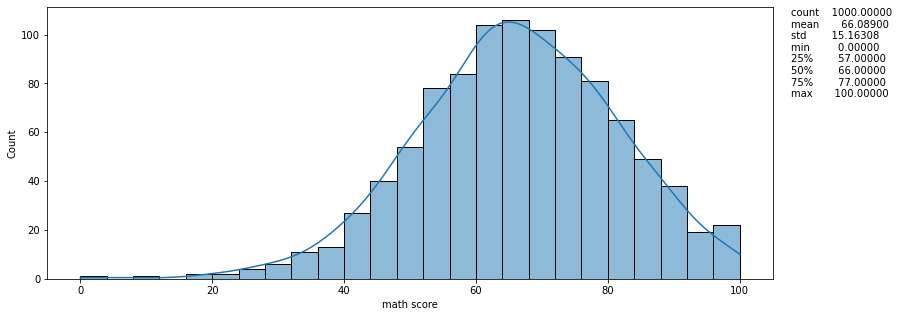

In [13]:
plt.figure(figsize=(13,5))
sns.histplot(df['math score'],bins='auto',kde=True)
plt.figtext(0.92,0.63,df.describe()['math score'].to_string())
hist , bin_edges = np.histogram(df['math score'],bins='auto')


In [14]:
import statistics as stat 
print(f"the mode is : {stat.mode(df['math score'])}")

the mode is : 65


<b>Organize the edges and frequencies of bins in a table</b>

In [15]:
from IPython.core.display import HTML
table = f'<table style="border:1px solid black;border-color: blue;width:80%;text-align:center"><tr><th style="text-align:center">Bin</th><th style="text-align:center">Range</th><th style="text-align:center">Frequency</th></tr>'
for i in range(len(hist)):
    table += f'<tr><td style="text-align:center">{i}</td><td style="text-align:center">]{bin_edges[i]:.2f} , {bin_edges[i+1]:.2f}]</td><td style="text-align:center">{hist[i]}</td></tr>'
table += f'</table>'
HTML(table)

Bin,Range,Frequency
0,"]0.00 , 4.00]",1
1,"]4.00 , 8.00]",0
2,"]8.00 , 12.00]",1
3,"]12.00 , 16.00]",0
4,"]16.00 , 20.00]",2
5,"]20.00 , 24.00]",2
6,"]24.00 , 28.00]",4
7,"]28.00 , 32.00]",6
8,"]32.00 , 36.00]",11
9,"]36.00 , 40.00]",13


<h2 style="color :red">THE CHI SQUARED GODNESS OF FIT TEST</h2>

The chi-squared goodness-of-fit test is a statistical test that compares the observed data to a theoretical distribution and tests the null hypothesis that the data follow the theoretical distribution.The chi-squared goodness-of-fit test is based on the assumption that the data are independent and randomly distributed according to the specified theoretical distribution.  Here are the general steps for performing a chi-squared goodness-of-fit test:
<ol>

<li>Choose a theoretical distribution: The first step is to choose a theoretical distribution that you want to test against the data. In this case, you would choose a full normal distribution as the theoretical distribution.</li>

<li>Specify the null hypothesis: The null hypothesis for a chi-squared goodness-of-fit test is that the observed data follow the theoretical distribution. In this case, the null hypothesis would be that the observed data follow a full normal distribution.</li>

<li>Bin the data: The next step is to bin the data into a set of intervals or categories. This involves dividing the range of the data into a set of discrete bins and counting the number of observations that fall into each bin.</li>

<li>Calculate the expected frequencies: The expected frequencies are the number of observations that you would expect to fall into each bin if the null hypothesis were true. To calculate the expected frequencies, you need to know the probability density function of the theoretical distribution and the size of each bin.</li>

<li>Calculate the chi-squared statistic: The chi-squared statistic is a measure of how well the observed data fit the theoretical distribution. It is calculated as the sum of the squared differences between the observed and expected frequencies, divided by the expected frequencies.</li>

<li>Determine the p-value: The p-value is the probability of observing a chi-squared statistic as extreme or more extreme than the one calculated from the data, assuming that the null hypothesis is true. The p-value is calculated using the chi-squared distribution and the degrees of freedom, which is the number of bins minus one. A small p-value (typically less than 0.05) suggests that the null hypothesis is not likely to be true and that the observed data do not follow the theoretical distribution.</li>

<li>Make a conclusion</li>
    
</ol>

<b><ul>
    <li>
        H0 : the observed data follow a normal distribution
    </li>
    <li>
        H1 : the observed data doesn't follow a normal distribution
    </li>
</ul></b>

In [16]:
#Importing the class that I created to perform the Chi-squared goodness-of-fit test.
import chi_squared_godness_of_fit_test as dist

In [17]:
#Creating an object
chi_squared_godness_of_fit_test = dist.chi_squared_godness_of_fit_test(df['math score'])

In [18]:
#bins information
bin_info = chi_squared_godness_of_fit_test.bin_information()

In [19]:
#Retrieving frequencies
bins_count = bin_info[1]
bins_count

array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
        44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
        88.,  92.,  96., 100.])

In [20]:
#Retrieving bin edges
bins_range = bin_info[1]
bins_range

array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
        44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
        88.,  92.,  96., 100.])

In [21]:
#Calculating the mean
mean = chi_squared_godness_of_fit_test.mean()
print('the mean is %.3f'%mean)

the mean is 66.544


In [22]:
#Calculating the standard deviation
std = chi_squared_godness_of_fit_test.std()
print('the mean is %.3f'%std)

the mean is 15.152


In [23]:
values = chi_squared_godness_of_fit_test.values()
values

[4.0,
 8.0,
 12.0,
 16.0,
 20.0,
 24.0,
 28.0,
 32.0,
 36.0,
 40.0,
 44.0,
 48.0,
 52.0,
 56.0,
 60.0,
 64.0,
 68.0,
 72.0,
 76.0,
 80.0,
 84.0,
 88.0,
 92.0,
 96.0]

In [24]:
#Calculating z-scores
z_scores = chi_squared_godness_of_fit_test.z_scores(values)
z_scores

array([-4.12764105, -3.86365787, -3.59967468, -3.3356915 , -3.07170832,
       -2.80772513, -2.54374195, -2.27975877, -2.01577558, -1.7517924 ,
       -1.48780922, -1.22382604, -0.95984285, -0.69585967, -0.43187649,
       -0.1678933 ,  0.09608988,  0.36007306,  0.62405624,  0.88803943,
        1.15202261,  1.41600579,  1.67998898,  1.94397216])

In [25]:
#Calculating probabilities of the corresponding z-scores
probability = chi_squared_godness_of_fit_test.probability(z_scores)
print('the probability that a value will fall within each bin if the null is true : ')
probability

the probability that a value will fall within each bin if the null is true : 


[1.8325181349931215e-05,
 3.752564200380547e-05,
 0.00010345694583399417,
 0.0002661298739919687,
 0.0006387503232930696,
 0.0014304516244381062,
 0.00298896405291758,
 0.005827396202797962,
 0.010600724003966912,
 0.017993031744189713,
 0.02849585127411483,
 0.04210832327952874,
 0.05805822541836059,
 0.07469120249389172,
 0.08965723426967304,
 0.10041801652844012,
 0.10494179622797145,
 0.10232834624927489,
 0.09310092457007368,
 0.07903555245220062,
 0.06260388049517396,
 0.04626898699825388,
 0.03190717385284825,
 0.02053032603495486,
 0.025949404260456332]

In [26]:
#Calculating the expected frequencies
expected_frequencies = chi_squared_godness_of_fit_test.expected_frequencies(probability)
print('expected frequencies : ')
expected_frequencies

expected frequencies : 


[0.018325181349931215,
 0.03752564200380547,
 0.10345694583399417,
 0.2661298739919687,
 0.6387503232930696,
 1.4304516244381063,
 2.98896405291758,
 5.827396202797962,
 10.600724003966912,
 17.993031744189715,
 28.49585127411483,
 42.10832327952873,
 58.058225418360585,
 74.69120249389172,
 89.65723426967304,
 100.41801652844012,
 104.94179622797145,
 102.32834624927489,
 93.10092457007369,
 79.03555245220062,
 62.60388049517396,
 46.26898699825388,
 31.907173852848246,
 20.53032603495486,
 25.949404260456333]

In [27]:
#Adding the expected frequencies to the table
from IPython.core.display import HTML
table = f'<table style="border:1px solid black;border-color: blue;width:80%;text-align:center"><tr><th style="text-align:center">Bin</th><th style="text-align:center">Range</th><th style="text-align:center">Frequency</th><th style="text-align:center">Epected Frequency</th></tr>'
for i in range(len(hist)):
    table += f'<tr><td style="text-align:center">{i}</td><td style="text-align:center">]{bin_edges[i]:.2f} , {bin_edges[i+1]:.2f}]</td><td style="text-align:center">{hist[i]}</td><td style="text-align:center">{expected_frequencies[i]:.5f}</td></tr>'
table += f'</table>'
HTML(table)

Bin,Range,Frequency,Epected Frequency
0,"]0.00 , 4.00]",1,0.01833
1,"]4.00 , 8.00]",0,0.03753
2,"]8.00 , 12.00]",1,0.10346
3,"]12.00 , 16.00]",0,0.26613
4,"]16.00 , 20.00]",2,0.63875
5,"]20.00 , 24.00]",2,1.43045
6,"]24.00 , 28.00]",4,2.98896
7,"]28.00 , 32.00]",6,5.82740
8,"]32.00 , 36.00]",11,10.60072
9,"]36.00 , 40.00]",13,17.99303


In [28]:
#Calculating the test statistic
chi_squared_statistic = chi_squared_godness_of_fit_test.chi_squared_statistic(expected_frequencies)
print('chi squared statistic : %.15f'%chi_squared_statistic)

chi squared statistic : 68.875001414206423


In [29]:
#Calculating the P-value
p_value = chi_squared_godness_of_fit_test.p_value(chi_squared_statistic)
print('The probability of getting %.15f or more extreme value is : %.10f'%(chi_squared_statistic,p_value))

The probability of getting 68.875001414206423 or more extreme value is : 0.0000009931


<h3 style='color:red'> p-value < 0.05 . Our sample suggest that the data don't follow a normal distribution </h3>

<h1 style="color:blue">TWO SAMPLE T-TEST </h1>

<b>Even though the distribution isn't normal , since the sample size is large enough we're still able to perform the test</b>

<b>Hypothesis1 : There is no significant difference in the mean score of students who have taken test preparation and those 
students who have not taken any test preparation</b>

<b>Let's say :<br>
    group A : contain students who have taken the test performance <br>
    group B : contain students who have not taken the test performance </b>

<h2 style="color:green">WELCH'S T-TEST </h2>

<b>It is used when the population variances are not assumed to be equal. </b>

In [30]:
groupA = df[df['test preparation course']=='completed'][['test preparation course','math score']]

In [31]:
groupB = df[df['test preparation course']=='none'][['test preparation course','math score']]

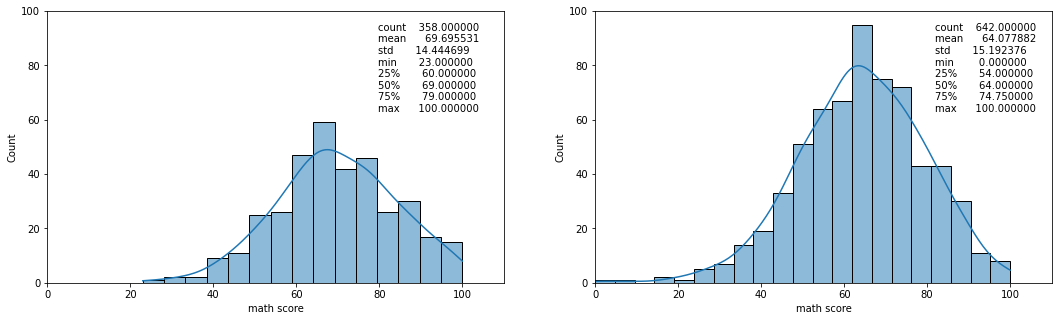

In [32]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.histplot(groupA['math score'],kde=True,bins='auto')
plt.figtext(0.38,0.6,groupA.describe()['math score'].to_string())
plt.xlim(0,110)
plt.ylim(0,100)

plt.subplot(1,2,2)
sns.histplot(groupB['math score'],kde=True,bins='auto')
plt.figtext(0.81,0.6,groupB.describe()['math score'].to_string())
plt.xlim(0,110)
plt.ylim(0,100)

plt.show()

In [33]:
#Importing the class that I created to perform two sample t-test .
from t_test import two_sample_t_test

In [34]:
#Creating an object
#Notice that variances are set to be inequal
t_test_result = two_sample_t_test(groupA['math score'],groupB['math score'],equal_variance=False)

In [35]:
#Calculating the statistic
t_stat = t_test_result.t_test()[0]
print('the t statistic is : %.10f'%t_stat)

the t statistic is : 5.7869831579


In [36]:
#Calculating the p-value
p_value = t_test_result.t_test()[1]
print('the p_value is : %.15f'%p_value)

the p_value is : 0.000000010425617


<h2 style="color:green">STANDARD TWO SAMPLE T-TEST </h2>

<b>It is used when the population variances are assumed to be equal. </b>

In [37]:
#Creating an object
#Equal variances 
standard_t_test_result = two_sample_t_test(groupA['math score'],groupB['math score'],equal_variance=True)

In [38]:
#the t-statistic and corresponding p-value
standard_t_test_result.t_test()

(5.7046164173491025, 1.53591346071473e-08)

In [39]:
t_stat1 = standard_t_test_result.t_test()[0]
print('the t statistic is : %.10f'%t_stat1)

the t statistic is : 5.7046164173


In [40]:
p_value1 = standard_t_test_result.t_test()[1]
print('the p_value is : %.15f'%p_value1)

the p_value is : 0.000000015359135


<h3 style="color:red">P_value lower than 0.05 , we conclude that our sample data support the claim that the population means 
are different.Especially groupA's mean id greater than groupB's mean</h3>

<h2 style="color:blue">Chi-Square Test of Independence</h2>

<b>Hypothesis 2: There is no relation between the gender of a student and their corresponding academic performance.</b>

<b>H0 : There is no relationship between gender of students and their corresponding academic performance.(independent)<br>
H1 : There is a relationship between gender of students and their corresponding academic performance.(dependent)</b>

In [41]:
df1 = df[['gender','math score','reading score','writing score']]

In [42]:
#Creating a new column that contains the mean score 
df1['mean score'] = (df1['math score']+df1['reading score']+df1['writing score'])/3

C:\Users\PC\AppData\Local\Temp/ipykernel_15128/3302892979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['mean score'] = (df1['math score']+df1['reading score']+df1['writing score'])/3


In [43]:
#Creating a new column, a categorical variable indicating whether the student succeeded or not.
df1["result"] = np.where(df1["mean score"] >= 40, "acceptable", "not acceptable")


C:\Users\PC\AppData\Local\Temp/ipykernel_15128/1579609980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["result"] = np.where(df1["mean score"] >= 40, "acceptable", "not acceptable")


In [44]:
df1

,gender,math score,reading score,writing score,mean score,result
0,female,72,72,74,72.666667,acceptable
1,female,69,90,88,82.333333,acceptable
2,female,90,95,93,92.666667,acceptable
3,male,47,57,44,49.333333,acceptable
4,male,76,78,75,76.333333,acceptable
...,...,...,...,...,...,...
995,female,88,99,95,94.000000,acceptable
996,male,62,55,55,57.333333,acceptable
997,female,59,71,65,65.000000,acceptable
998,female,68,78,77,74.333333,acceptable


In [45]:
#importing the class that I created to perform test of independence
from test_of_independence import chi_square_test

In [46]:
#Creating an object
test_of_independence = chi_square_test(df1['gender'],df1['result'])

In [47]:
#contingency table
test_of_independence.contingency_table()

result,acceptable,not acceptable,All
gender,,,
female,502,16,518
male,468,14,482
All,970,30,1000


In [48]:
#Extracting the observed values
test_of_independence.observed_values()

[502, 16, 468, 14]

In [49]:
#Calculating the expected values
test_of_independence.expected_values()

[502.46, 15.54, 467.54, 14.46]

In [50]:
#Calculating the statistic of the test
test_of_independence.chi_squared_value()

0.029123654909683938

In [51]:
#degree of freedom
degree_of_freedom = (len(df1['result'].value_counts())-1)*(len(df1['gender'].value_counts())-1)

In [52]:
#Critical value
stats.chi2.ppf(0.9,degree_of_freedom)

2.705543454095404

<h3 style="color:red">Our critical value is much larger than the value calculated . We fail to reject our null hypothesis that there is no relationship between gender and overall performance</h3>

<h1 style="color : blue">CONCLUSIONS</h1>

<b>
   <ul>
       <li>There is a difference in the mean score of students who have taken test preparation and those students who have not taken any test preparation</li>
       <li>There is no relationship between gender and overall performance</li>
    </ul>

</b>